# 판다스 내장 함수
- 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포트하지 않고 간단히 그래프를 그릴 수 있음
- 선그래프 : df.plot() 메소드 적용 시 다른 옵션을 추가하지 않으면 기본적인 선 그래프를 그림
- 막대그래프 : df.plot(kind='bar'), 수평 = df.plot(kind='barh',stacked=True,alpha=0.8)
- 히스토그램 : df.plot(kind='gist')
- 산점도 : df.plot(x='',y='',kind='scatter'),상관관계를 볼 수 있음
- 박스 플롯 : df.plot(kind='box').df.boxplot(column=['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공

# matplotlib 함수
- histogram : plt.hist(x, bins=)
- line plot : plt.plot(x,y)
- plt.bar(x,y,color='')
- scatter plot : plt.scatter(x,y)

# seaborn 함수
- sns.distplot(data, bins=, color= , kde=)
- sns.boxplot(x,y,data,color)
- sns.violinplot(x,y,data,color)
- sns.jointplot(x,y,data,color)
- sns.pairplot(data,hue,palette)
- sns.lmplot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg=False)

seaborn.pydate


In [53]:
import pandas as pd
import numpy as np
df = pd.read_csv('./dataset/주가데이터.csv')
df.head()

,연월일,당일종가,전일종가,시가,고가,저가,거래량
0,2018-07-02,10100,600,10850,10900,10000,137977
1,2018-06-29,10700,300,10550,10900,9990,170253
2,2018-06-28,10400,500,10900,10950,10150,155769
3,2018-06-27,10900,100,10800,11050,10500,133548
4,2018-06-26,10800,350,10900,11000,10700,63039


In [2]:
new_columns=['Date','Close','Start','High','Low','Volumn']
df.drop('전일종가',axis=1,inplace=True)
df.columns=new_columns

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연월일     20 non-null     object
 1   당일종가    20 non-null     int64 
 2   전일종가    20 non-null     int64 
 3   시가      20 non-null     int64 
 4   고가      20 non-null     int64 
 5   저가      20 non-null     int64 
 6   거래량     20 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.2+ KB


In [3]:
df.Date = pd.to_datetime(df.Date)
df.set_index('Date',inplace=True)
df.drop(['Volumn'],axis=1,inplace=True)
df.head()

,Close,Start,High,Low
Date,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


# plot

<AxesSubplot:xlabel='Date'>

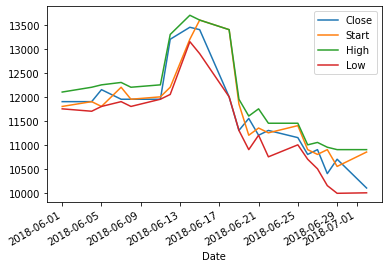

In [4]:
df.plot()

## plot-bar

<AxesSubplot:xlabel='Date'>

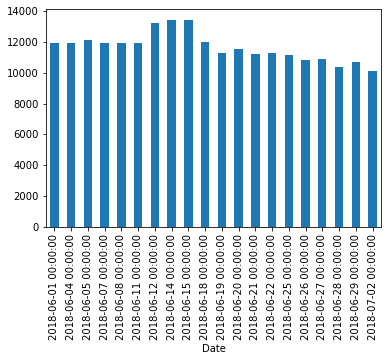

In [35]:
df=df.sort_index()
df.Close.plot(kind='bar')

In [38]:
df

,Close,Start,High,Low
Date,,,,
2018-06-01,11900,11800,12100,11750
2018-06-04,11900,11900,12200,11700
2018-06-05,12150,11800,12250,11800
2018-06-07,11950,12200,12300,11900
2018-06-08,11950,11950,12200,11800
2018-06-11,11950,12000,12250,11950
2018-06-12,13200,12200,13300,12050
2018-06-14,13450,13200,13700,13150
2018-06-15,13400,13600,13600,12900


<AxesSubplot:xlabel='Date'>

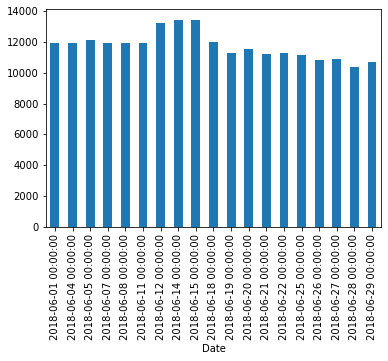

In [41]:
# 6월 데이터만을 추출해서 Close 칼럼으로 일별 막대그래프를 표현하세요

df.loc[df.index<'2018-07-01'].Close.plot(kind='bar')
df.loc['2018-06'].Close.plot(kind='bar')

데이터타임 인덱싱 가능함

In [44]:
df.head()
df.loc['2018-07'] 

,Close,Start,High,Low
Date,,,,
2018-07-02,10100,10850,10900,10000


## plot-hist

<AxesSubplot:ylabel='Frequency'>

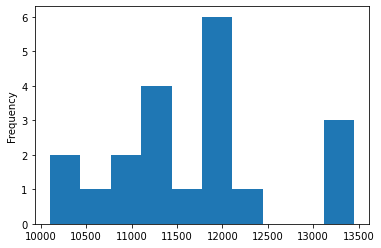

In [45]:
df.Close.plot(kind='hist')

In [49]:
df

,Close,Start,High,Low
Date,,,,
2018-06-01,11900,11800,12100,11750
2018-06-04,11900,11900,12200,11700
2018-06-05,12150,11800,12250,11800
2018-06-07,11950,12200,12300,11900
2018-06-08,11950,11950,12200,11800
2018-06-11,11950,12000,12250,11950
2018-06-12,13200,12200,13300,12050
2018-06-14,13450,13200,13700,13150
2018-06-15,13400,13600,13600,12900


In [57]:
df.rename(columns={'Volumn':'Volume'},inplace=True)

<AxesSubplot:ylabel='Frequency'>

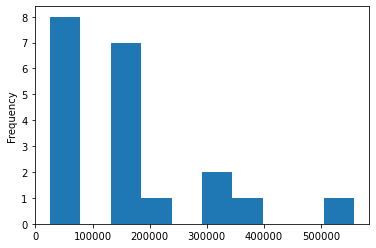

In [58]:
df.Volume.plot(kind='hist')

<AxesSubplot:xlabel='Volume', ylabel='Count'>

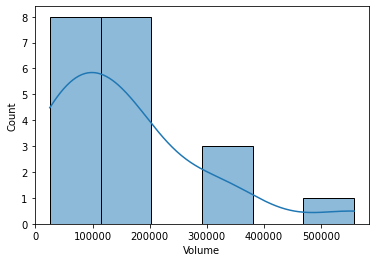

In [59]:
import seaborn as sns
sns.histplot(df.Volume,kde=True)

## plot-scatter(산점도)

<AxesSubplot:xlabel='Close', ylabel='Volume'>

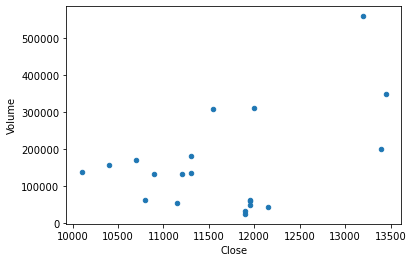

In [60]:
df.plot(x='Close',y='Volume',kind='scatter')

## Box Plot 

<AxesSubplot:>

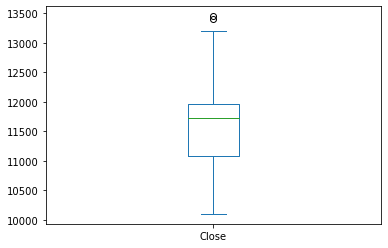

In [62]:
df.Close.plot(kind='box')
#박스는 1분위와 3분위 사이
#녹색은 중앙갑슈

### Box Plot 의미 해석
- IQR(Inter Quartile Range) : 제 3사분위수(Q3) - 제1사분위수(Q1)
- lower whisker : Q1 - 1.5 * IQR 이내인 값중에서 최솟값
- upper whisker : Q3 + 1.5 * IQR 이내인 값중에서 최댓값
- 이상치 : lower whisker, upper whisper를 벗어나는 값

In [65]:
df.Close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

In [75]:
#Close 컬럼의 이상치
Q1 = df.Close.quantile(.25)
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
uw_check=Q3 + 1.5 * IQR
print(Q3 + 1.5 * IQR)
print(df.Close.sort_values(ascending=False))
df.Close.loc[df.Close > Q3 + 1.5 * IQR]


13275.0
Date
2018-06-14    13450
2018-06-15    13400
2018-06-12    13200
2018-06-05    12150
2018-06-18    12000
2018-06-07    11950
2018-06-08    11950
2018-06-11    11950
2018-06-04    11900
2018-06-01    11900
2018-06-20    11550
2018-06-19    11300
2018-06-22    11300
2018-06-21    11200
2018-06-25    11150
2018-06-27    10900
2018-06-26    10800
2018-06-29    10700
2018-06-28    10400
2018-07-02    10100
Name: Close, dtype: int64


Date
2018-06-15    13400
2018-06-14    13450
Name: Close, dtype: int64

## 과제

In [79]:
#[과제] Start 칼럼의 분포 및 이상치 여부를 탐색하는 Box Plot 및 이상치를 구하세요.

Date
2018-06-15    13600
Name: Start, dtype: int64

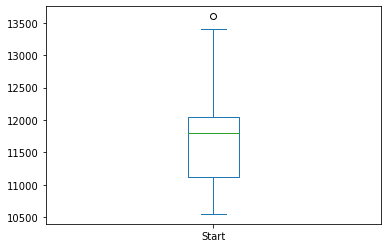

In [124]:
df.Start.plot(kind='box')
Q3=df.Start.quantile(.75)
Q1=df.Start.quantile(.25)
IQR = Q3 - Q1
l_w= Q1 - 1.5 * IQR
u_w= Q3 +1.5 * IQR
df.Start.loc[(df.Start>u_w) | (df.Start<l_w)]

In [ ]:
#[과제] df_ep 데이터 프레임으로 다음을 수행하세요
-선그래프
-'south'칼럼의 막대그래프
-'south'칼럼의 히스토그램
- box plot

In [102]:
df=pd.read_excel('./dataset/df_ep.xlsx')
df.set_index('year',inplace=True)
df.head()

,south,north
year,,
1990,1077,277
1991,1186,263
1992,1310,247
1993,1444,221
1994,1650,231


<AxesSubplot:xlabel='year'>

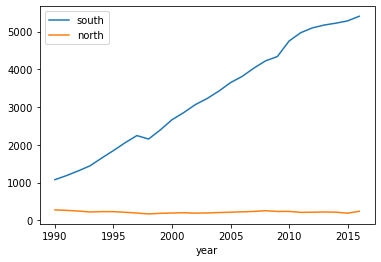

In [103]:
#선그래프
df.plot()

<AxesSubplot:xlabel='year'>

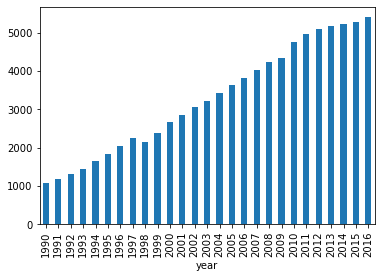

In [104]:
#'south'칼럼의 막대그래프
df.south.plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

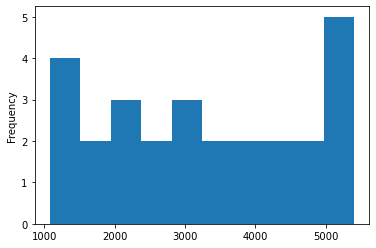

In [106]:
#'south'칼럼의 히스토그램
df.south.plot(kind='hist')

<AxesSubplot:>

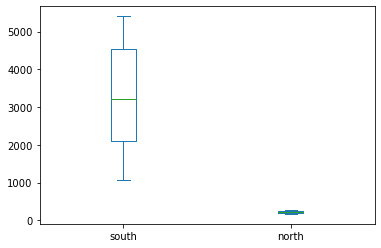

In [108]:
#box plot
df.plot(kind='box')

In [ ]:
#[과제] df_auto의 각 칼럼을 시각화해서 탐색한 후 인사이트를 기술하세요(5개 이상)

<AxesSubplot:ylabel='Frequency'>

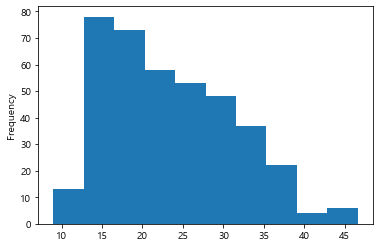

In [344]:
df_auto["mpg"].plot(kind="hist", bins=10)

<AxesSubplot:>

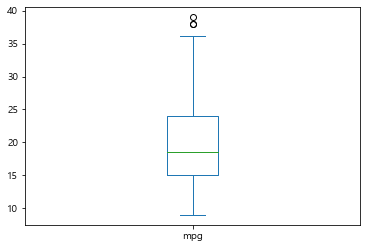

In [346]:
df_auto[df_auto['origin'] == 1]['mpg'].plot(kind='box')

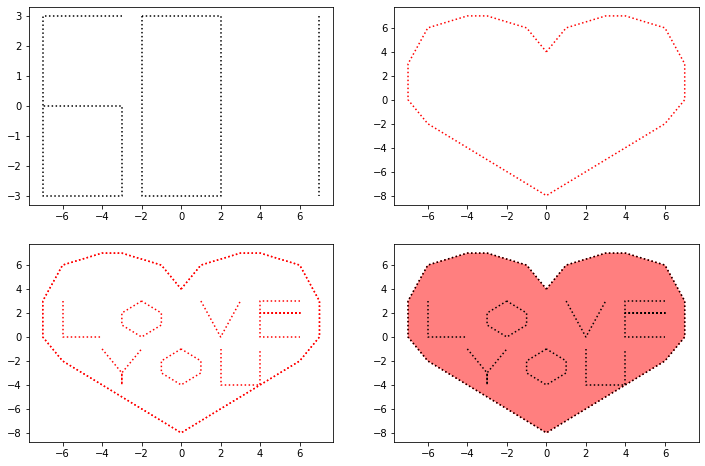

In [23]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

x = [0,1,3,4,6,7,7,6,5,4,3,0,-3,-4,-5,-6,-7,-7,-6,-4,-3,-1,0]
y = [4,6,7,7,6,3,0,-2,-3,-4,-5,-8,-5,-4,-3,-2,0,3,6,7,7,6,4]

def heart(axis):
    axis.plot(x,y,'red',linestyle=':')

def loveu(axis,color):
    x1 = [0,1,3,4,6,7,7,6,5,4,3,0,-3,-4,-5,-6,-7,-7,-6,-4,-3,-1,0]
    y1 = [4,6,7,7,6,3,0,-2,-3,-4,-5,-8,-5,-4,-3,-2,0,3,6,7,7,6,4] ; axis.plot(x1,y1,color,linestyle=':')
    x2 = [-6,-6,-4]
    y2 = [3,0,0] ; axis.plot(x2,y2,color,linestyle=':')
    x3 = [-2,-3,-3,-2,-1,-1,-2]
    y3 = [3,2,1,0,1,2,3] ; axis.plot(x3,y3,color,linestyle=':')
    x4 = [1,2,3]
    y4 = [3,0,3] ; axis.plot(x4,y4,color,linestyle=':')
    x5 = [6,4,4,6,4,4,6]
    y5 = [3,3,2,2,2,0,0] ; axis.plot(x5,y5,color,linestyle=':')
    x6 = [-4,-3,-3,-3,-2]
    y6 = [-1,-3,-4,-3,-1] ; axis.plot(x6,y6,color,linestyle=':')
    x7 = [0,-1,-1,0,1,1,0]
    y7 = [-1,-2,-3,-4,-3,-2,-1] ; axis.plot(x7,y7,color,linestyle=':')
    x8 = [2,2,4,4]
    y8 = [-1,-4,-4,-1] ; axis.plot(x8,y8,color,linestyle=':')

def class601(axis):
    x9 = [-3,-7,-7,-3,-3,-7]
    y9 = [3,3,-3,-3,0,0] ; axis.plot(x9,y9,'black',linestyle=':')
    x10 = [-2,-2,2,2,-2]
    y10 = [3,-3,-3,3,3] ; axis.plot(x10,y10,'black',linestyle=':')
    x11 = [7,7]
    y11 = [3,-3] ; axis.plot(x11,y11,'black',linestyle=':')

class601(ax1)
heart(ax2)
heart(ax3)
loveu(ax3,'red')
heart(ax4)
loveu(ax4,'black')
ax4.fill(x,y,'r',alpha=0.5)

<AxesSubplot:ylabel='count'>

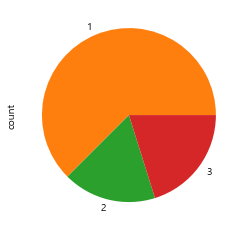

In [342]:
#제조국별 제조개수
df_auto['count'] = df_auto.groupby('origin').size()
df_auto['count'].plot(kind="pie")

<AxesSubplot:xlabel='mpg', ylabel='weight'>

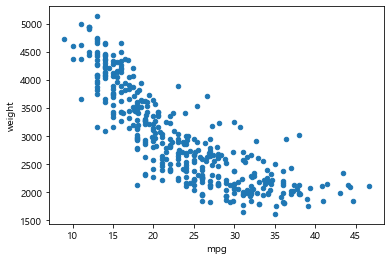

In [295]:
# 연비와 무계는 반비례관계
df_auto.plot(x='mpg',y='weight',kind='scatter')

In [340]:
df_auto=pd.read_excel('./dataset/auto-mpg.xlsx')
df_auto.horsepower.replace('?',np.nan,inplace=True)
df_auto.dropna(subset=['horsepower'],axis=0,inplace=True)
display(df_auto.head())

# 연비와 제조국 
# 모델별 연비
# 실린더수 배기량
# 실린더수 출력
# 출력과 배기량
#mpg : 연비
#cylinders : 실린더수 
#displacement : 배기량
#horsepower: 출력
#weight : 차중
#acceleration : 가속능력
#model year : 출시년도
#origin : 제조국 1(USA), 2(EU), 3(JPN)
#car name : 모델명

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


# matplotlib

## plt

(array([1., 3., 2., 2., 2., 2., 2., 3., 6., 2., 3., 2., 4., 3., 1., 4., 3.,
        1., 2., 2.]),
 array([ 2. ,  4.7,  7.4, 10.1, 12.8, 15.5, 18.2, 20.9, 23.6, 26.3, 29. ,
        31.7, 34.4, 37.1, 39.8, 42.5, 45.2, 47.9, 50.6, 53.3, 56. ]),
 <BarContainer object of 20 artists>)

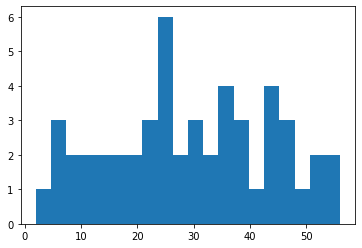

In [7]:
import numpy as np
x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])
import matplotlib.pyplot as plt
np.random.seed(0)
data=np.arange(50) + np.random.randint(1,10,size=50)
plt.hist(data, bins=20)

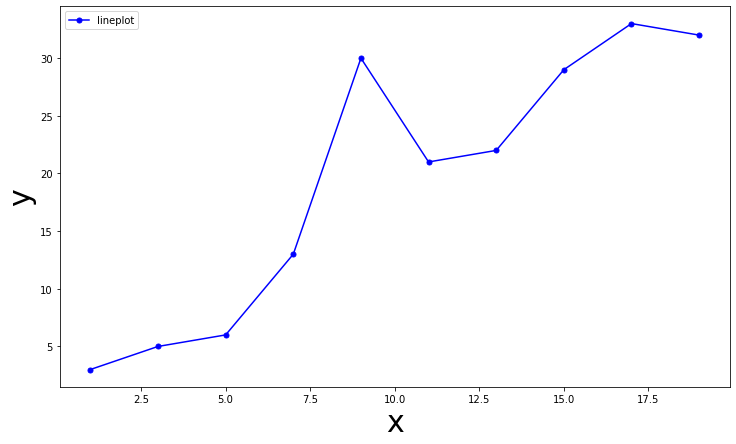

In [177]:
plt.figure(figsize=(10,7))
plt.plot(x,y,color='blue',marker='o',markersize=5)
plt.xlabel('x',size=30)
plt.ylabel('y',size=30)
plt.legend(labels=['lineplot'])

Text(0.5, 1.0, 'Line Graph')

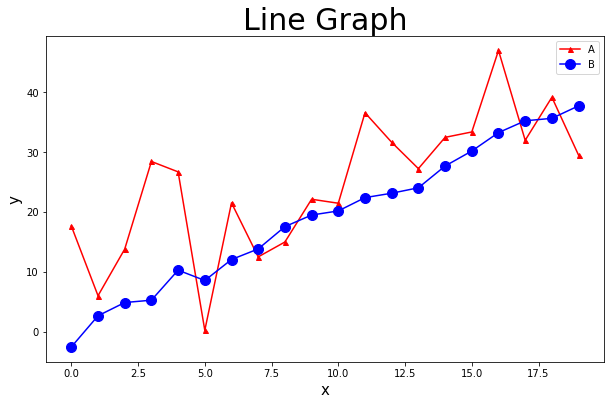

In [202]:
np.random.seed(0)
x=np.arange(20)
y1=np.arange(20)*2 + np.random.randn(20)*10
y2=np.arange(20)*2+np.random.randn(20)
plt.figure(figsize=(10,6))
plt.plot(x,y1,color='red',marker='^',markersize=5)
plt.plot(x,y2,color='blue',marker='o',markersize=10)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
plt.legend(labels=['A','B'])
plt.title('Line Graph',size=30)

## 막대그래프

Text(0.5, 0, 'X')

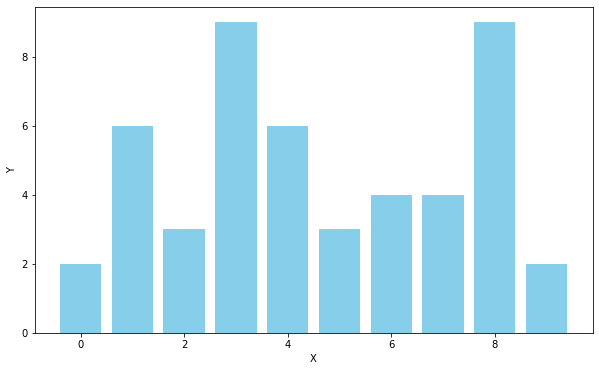

In [8]:
import warnings
warnings.filterwarnings('ignore')
y=np.random.randint(2,10,size=10)
x=range(len(y))
plt.figure(figsize=(10,6))
plt.bar(x,y,width=0.8,color='skyblue')
plt.ylabel('Y')
plt.xlabel('X')

In [222]:
df=pd.read_csv('./dataset/movie.csv')
df

,targetDt,rank,rankOldAndNew,movieCd,movieNm,salesAmt,audiCnt
0,20180220,1,OLD,20170561,블랙 팬서,1339822000,171158
1,20180220,2,OLD,20168250,골든슬럼버,363771900,48097
2,20180220,3,OLD,20179205,조선명탐정: 흡혈괴마의 비밀,296896400,40318
3,20180220,4,OLD,20176121,흥부: 글로 세상을 바꾼 자,126148600,16991
4,20180220,5,OLD,20078561,명탐정 코난:감벽의 관,78434800,11466
5,20180220,6,NEW,20179985,코코,56664400,7967


Text(0.5, 0, '영화명')

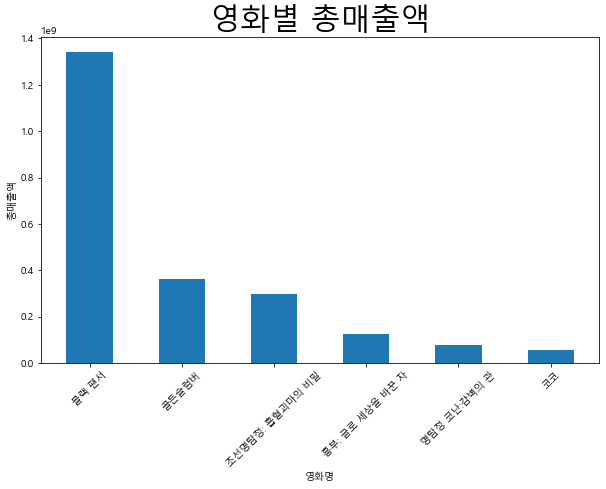

In [233]:
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic') # 한글 폰트 설정
mpl.rcParams['axes.unicode_minus']=False # 마이너스 단위 처리
plt.figure(figsize=(10,6))
plt.bar(df.movieNm,df.salesAmt,width=0.5)
plt.xticks(rotation=45)
plt.title('영화별 총매출액',size=30)
plt.ylabel('총매출액')
plt.xlabel('영화명')


## scatter plot

Text(0, 0.5, 'weight')

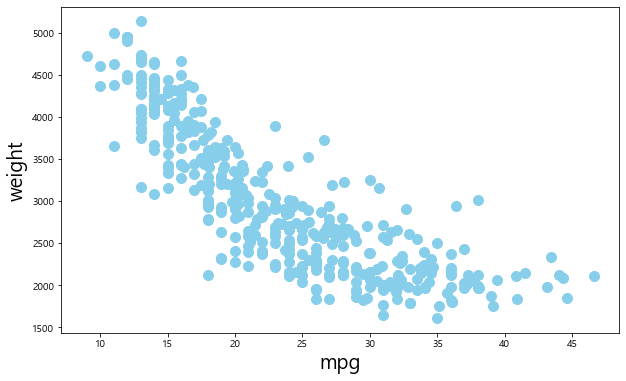

In [241]:
df_auto = pd.read_excel('./dataset/auto-mpg.xlsx',engine='openpyxl')
x=df_auto.mpg
y=df_auto.weight
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='skyblue',s=100)
plt.xlabel('mpg',size=20)
plt.ylabel('weight',size=20)

## histogram

(array([ 3., 10., 40., 38., 36., 37., 30., 31., 21., 33., 24., 24., 20.,
        18., 13.,  9.,  4.,  1.,  5.,  1.]),
 array([ 9.  , 10.88, 12.76, 14.64, 16.52, 18.4 , 20.28, 22.16, 24.04,
        25.92, 27.8 , 29.68, 31.56, 33.44, 35.32, 37.2 , 39.08, 40.96,
        42.84, 44.72, 46.6 ]),
 <BarContainer object of 20 artists>)

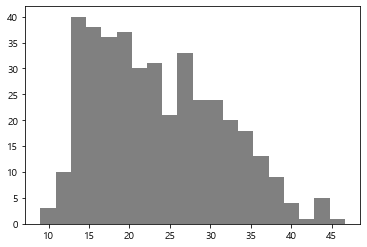

In [247]:
plt.hist(x,bins=20,color='gray')

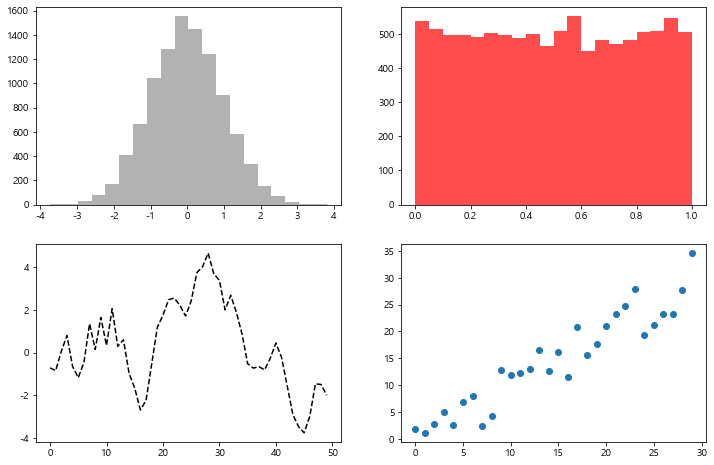

In [262]:
fig=plt.figure(figsize=(12,8))
#figure가 2x2크기이고 4개의 서브플롯
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)
np.random.seed(0)

ax1.hist(np.random.randn(10000),bins=20,color='k',alpha=0.3)
ax2.hist(np.random.rand(10000),bins=20,color='r',alpha=0.7)
ax3.plot(np.random.randn(50).cumsum(),'k--',alpha=1) #누적이지만 마이너스값도 누적됨
ax4.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))

## 과제

In [ ]:
#[과제] 히스토그램, 선, 막대, 산점도 그래프 4개를 서브플롯으로 출력하세요.

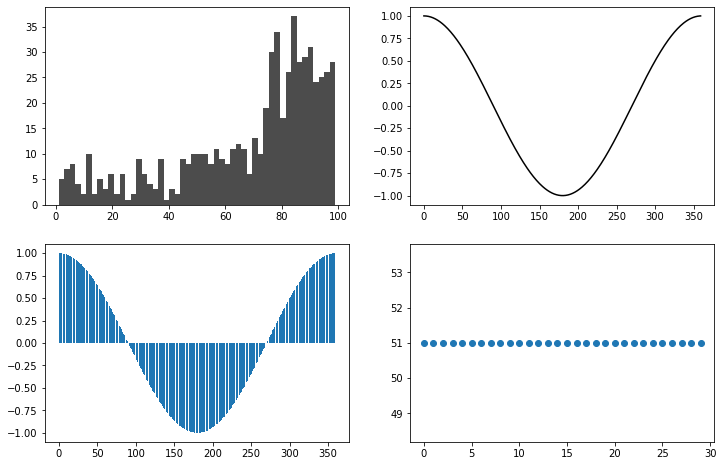

In [22]:
import math
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

#=======================히스토그램=======================
num=np.zeros(600)
for i in range(100): num[i]=np.random.randint(1,45)
for i in range(100,250): num[i]=np.random.randint(45,75)
for i in range(250,600): num[i]=np.random.randint(75,100)    
ax1.hist(num, bins = 50, color ='k',alpha = 0.7) 
#=======================선=======================
x=np.arange(360)
y=[]
for i in x:
    a=math.cos(math.pi*(i/180))
    y.append(a)    
ax2.plot(x,y,  color = 'k')
#=======================막대=======================
ax3.bar(x,y,width=0.8)
#=======================산점도=======================
sc_x=np.arange(30)
sc_y=np.full(30,51)
ax4.scatter(sc_x,sc_y)


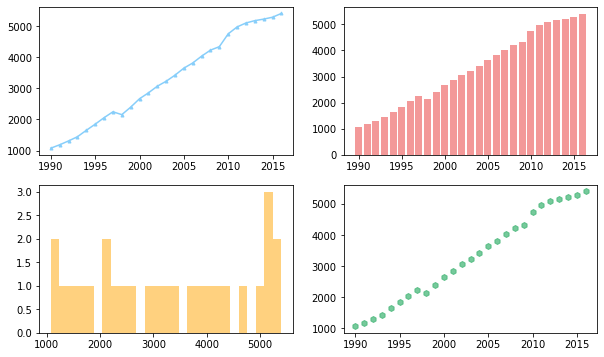

In [21]:
df_ep = pd.read_excel('./dataset/df_ep.xlsx')
df_ep.set_index('year',inplace=True)
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

plt.xlabel
ax1.plot(df_ep.south,color='lightskyblue',marker='^',markersize=3)
ax2.bar(df_ep.index,df_ep.south,color='lightcoral',width=0.8,alpha=0.8)
ax3.hist(df_ep.south,bins=len(df_ep),color='orange',alpha=0.5)
ax4.scatter(df_ep.index,df_ep.south,color='mediumseagreen',alpha=0.7,marker='h')


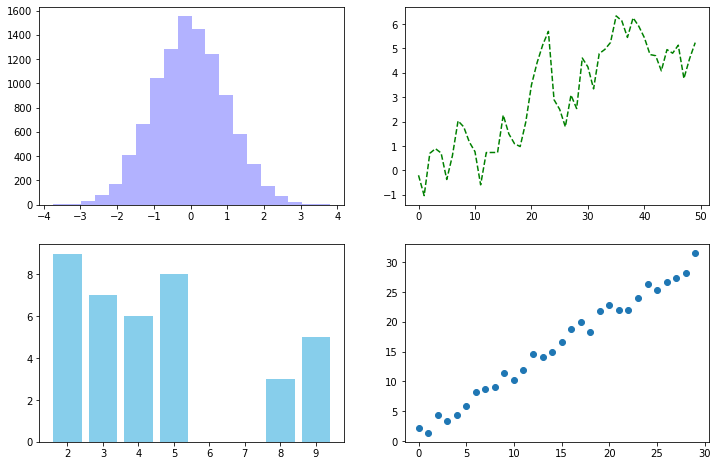

In [18]:
fig = plt.figure(figsize=(12,8))
# figure가 2x2 크기이고 4개의 서브플룻
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
np.random.seed(0)
ax1.hist(np.random.randn(10000), bins=20, color='blue',alpha=0.3)
ax2.plot(np.random.randn(50).cumsum(), 'g--')
ax3.bar(np.random.randint(2,10,size=10),range(10),color = 'skyblue' )
ax4.scatter(np.arange(30),np.arange(30)+3*np.random.rand(30))


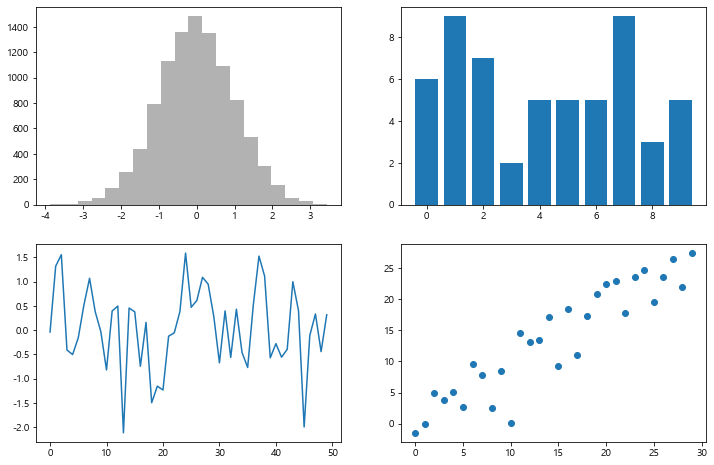

In [338]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)
np.random.seed(0)
y=np.random.randint(2,10,size=10)
x=range(len(y))
ax1.hist(np.random.randn(10000),bins=20,color='k',alpha=0.3)
ax2.bar(x,y)
ax3.plot(np.random.randn(50)) #누적이지만 마이너스값도 누적됨
ax4.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))

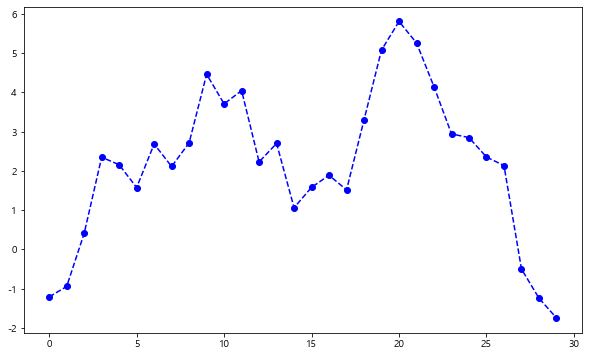

In [273]:
from numpy.random import randn
plt.figure(figsize=(10,6))
plt.plot(randn(30).cumsum(), linestyle='dashed',color='b',marker='o')

In [282]:
t3

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [283]:
t3=pd.read_csv('./dataset/titanic3.csv')
t3.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [285]:
# t3에서 age열을 범주화한 후 age_cat 열을 추가하세요.
def catage(age):
    cat = ''
    if age<10: cat='Child'
    elif age<20: cat='Teen'
    elif age<30: cat='20s'
    elif age<40: cat='30s'
    elif age<50: cat='40s'
    elif age<60: cat='50s'
    else: cat='Eldery'
    return cat
t3['age_cat'] = t3.age.apply(lambda x:catage(x))
t3.head()
t3[['age','age_cat']].head()

,age,age_cat
0,29.00,20s
1,0.92,Child
2,2.00,Child
3,30.00,30s
4,25.00,20s


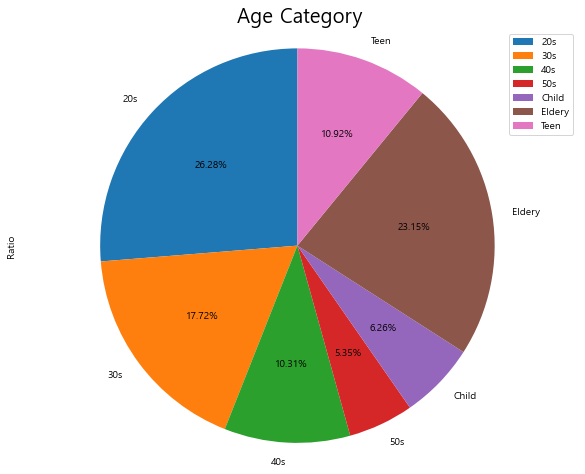

In [292]:
t3['Ratio'] = 1
df_age_cat= t3.groupby('age_cat').sum()

df_age_cat.Ratio.plot(kind='pie',
                     figsize=(10,8),
                     autopct='%.2f%%',
                    startangle=90)
plt.title('Age Category',size=20)
plt.axis('equal')
plt.legend(labels=df_age_cat.index,loc='best')

# seaborn

In [1]:
!pip install seaborn

## histplot

<AxesSubplot:xlabel='length', ylabel='Count'>

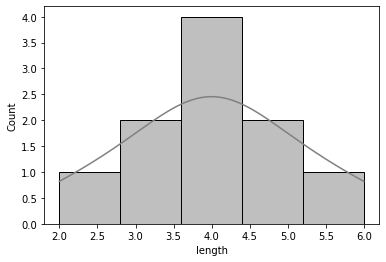

In [57]:
import seaborn as sns
df=pd.read_csv('dataset/4_fm2.csv')
length_a = df.query('species=="A"')['length']
length_b = df.query('species=="B"')['length']
sns.histplot(length_a,color='gray',kde=True)

## boxplot

In [51]:
df

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4
5,A,4
6,A,4
7,A,5
8,A,5
9,A,6


In [61]:
df_group=df.groupby('species')
df_group.get_group('A').describe()

,length
count,10.000000
mean,4.000000
std,1.154701
min,2.000000
25%,3.250000
50%,4.000000
75%,4.750000
max,6.000000


<AxesSubplot:xlabel='species', ylabel='length'>

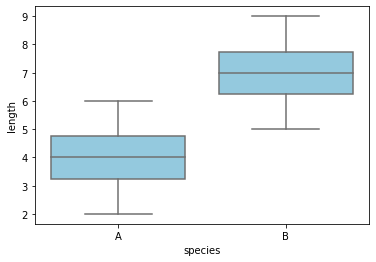

In [69]:
sns.boxplot(x='species',y='length',data=df,color='skyblue')

## violinplot

<AxesSubplot:xlabel='species', ylabel='length'>

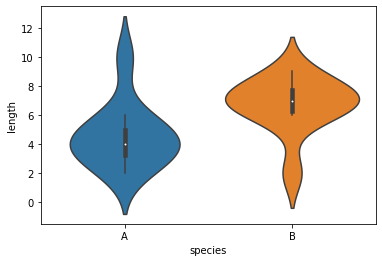

In [67]:
sns.violinplot(x='species',y='length',data=df1)

In [66]:
df1=df.copy()
df1.iloc[5,1]=10
df1.iloc[10,1]=2

### 과제

<AxesSubplot:xlabel='species', ylabel='length'>

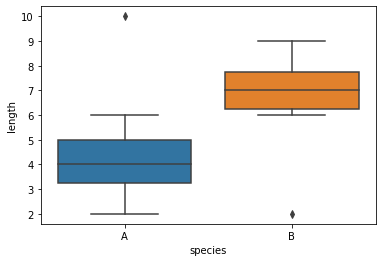

In [70]:
# 이상치 값 구하기
sns.boxplot(x='species',y='length',data=df1)

<AxesSubplot:xlabel='species', ylabel='length'>

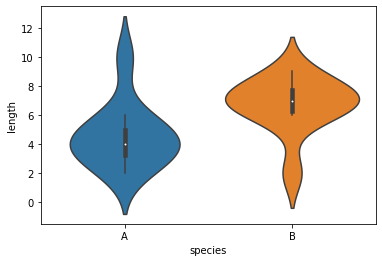

In [76]:
sns.violinplot(x='species',y='length',data=df1)

## jointplot

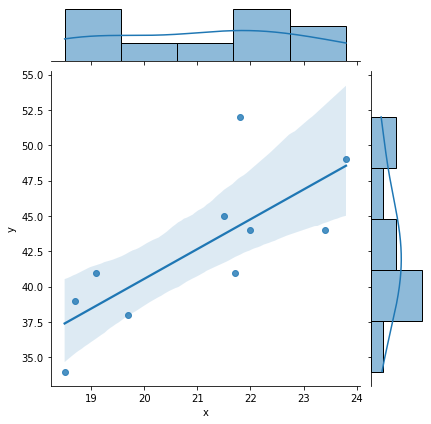

In [91]:
cov_df=pd.read_csv('dataset/4_cov.csv')
# sns.jointplot(cov_df.x,cov_df.y)
sns.jointplot(cov_df.x,cov_df.y,kind='reg')

## lmplot

In [92]:
df_auto=pd.read_excel('dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


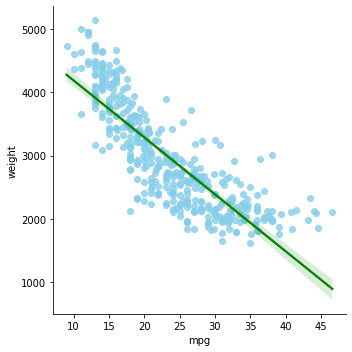

In [94]:
sns.lmplot(x='mpg',y='weight',data=df_auto,scatter_kws={'color':'skyblue'},line_kws={'color':'green'})

## regplot

<AxesSubplot:xlabel='mpg', ylabel='weight'>

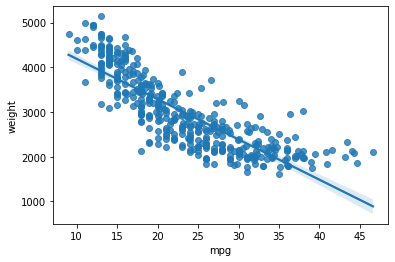

In [95]:
sns.regplot(x='mpg',y='weight',data=df_auto,fit_reg=True)

## pairplot

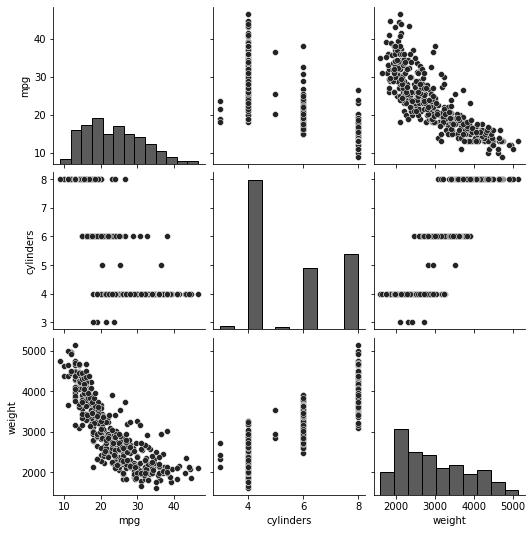

In [107]:
df2=df_auto[['mpg','cylinders','weight']]
sns.set_palette('gray')
sns.pairplot(df2)

## heatmap

In [118]:
tdf

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Text(0.5, 1.0, 'Heatmap of the Dataset')

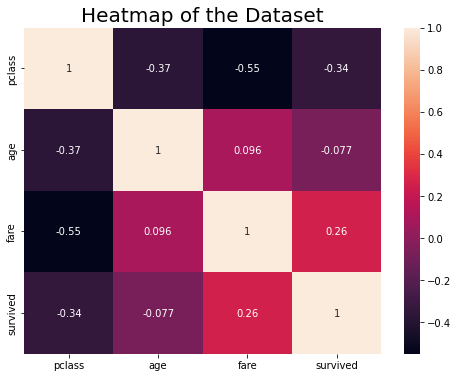

In [121]:
tdf=sns.load_dataset('titanic')
plt.figure(figsize=(8,6))
sns.heatmap(tdf[['pclass','age','fare','survived']].corr(),annot=True)
plt.title('Heatmap of the Dataset', fontsize=20)

In [126]:
table=tdf.pivot_table(index=['sex'],columns=['class'],values=['survived'],aggfunc='mean')
table

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<AxesSubplot:xlabel='None-class', ylabel='sex'>

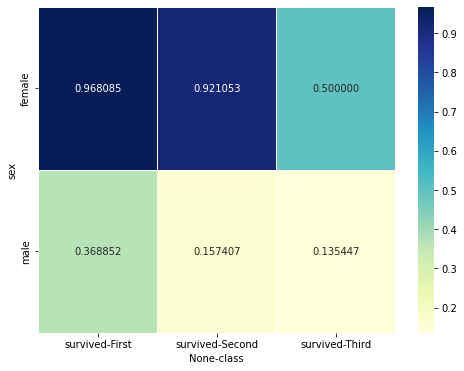

In [133]:
plt.figure(figsize=(8,6))
sns.heatmap(table,annot=True,fmt='f',
           cmap='YlGnBu',
           linewidths=.5,
           cbar=True)